In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Evaluation

from sklearn import metrics

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [5]:
#droppping empty cells
df = df.dropna()

We will take a subset sample of the data to work upon

In [6]:
df = df.sample(n = 100000)

Dropping Unnamed, ID and Case number as this can have no relation with the class of crime

In [7]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 708596 to 1296987
Data columns (total 20 columns):
Date                    100000 non-null object
Block                   100000 non-null object
IUCR                    100000 non-null object
Primary Type            100000 non-null object
Description             100000 non-null object
Location Description    100000 non-null object
Arrest                  100000 non-null bool
Domestic                100000 non-null bool
Beat                    100000 non-null int64
District                100000 non-null float64
Ward                    100000 non-null float64
Community Area          100000 non-null float64
FBI Code                100000 non-null object
X Coordinate            100000 non-null float64
Y Coordinate            100000 non-null float64
Year                    100000 non-null int64
Updated On              100000 non-null object
Latitude                100000 non-null float64
Longitude               100000 non-nu

Converting dates to numerical values for correlation

In [8]:
df['date_new'] = pd.to_datetime(df['Date'])
df['Hr'] = df['date_new'].dt.hour
df['Min'] = df['date_new'].dt.minute
df['Sec'] = df['date_new'].dt.second 
df['YY'] = df['date_new'].dt.year
df['MM'] = df['date_new'].dt.month
df['DD'] = df['date_new'].dt.day



df = df.drop(['Date'], axis=1) 
df = df.drop(['date_new'], axis=1)
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Year,Latitude,Longitude,Location,Hr,Min,Sec,YY,MM,DD
708596,028XX N LONG AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,SMALL RETAIL STORE,False,True,2514,25.0,31.0,...,2013,41.931564,-87.761343,"(41.931564146, -87.761343076)",15,30,0,2013,12,26
26540,006XX N UNION AVE,0460,BATTERY,SIMPLE,OTHER,False,False,1214,12.0,27.0,...,2014,41.892896,-87.645888,"(41.892895925, -87.645887668)",8,8,0,2014,8,14
370153,124XX S STATE ST,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, GROUNDS",False,False,523,5.0,9.0,...,2012,41.667504,-87.622283,"(41.667503644, -87.622282981)",10,40,0,2012,11,16
1103299,0000X W CHECKPOINT 6 ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,False,False,1653,16.0,41.0,...,2016,41.975869,-87.902593,"(41.97586893, -87.902593203)",5,0,0,2016,4,10
1010405,044XX N MAGNOLIA AVE,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,CHA PARKING LOT/GROUNDS,True,False,1913,19.0,46.0,...,2015,41.962581,-87.660979,"(41.962581499, -87.660978843)",21,30,0,2015,4,23


Converting Categorical Features to Numerical

In [9]:
df['Block'] = pd.factorize(df["Block"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]

df['Location Description'] = pd.factorize(df["Location Description"])[0]

df['Location'] = pd.factorize(df["Location"])[0] 

df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]

In [10]:
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Year,Latitude,Longitude,Location,Hr,Min,Sec,YY,MM,DD
708596,0,0,THEFT,0,0,False,True,2514,25.0,31.0,...,2013,41.931564,-87.761343,0,15,30,0,2013,12,26
26540,1,1,BATTERY,1,1,False,False,1214,12.0,27.0,...,2014,41.892896,-87.645888,1,8,8,0,2014,8,14
370153,2,1,BATTERY,1,2,False,False,523,5.0,9.0,...,2012,41.667504,-87.622283,2,10,40,0,2012,11,16
1103299,3,2,OTHER OFFENSE,2,3,False,False,1653,16.0,41.0,...,2016,41.975869,-87.902593,3,5,0,0,2016,4,10
1010405,4,3,CRIMINAL TRESPASS,3,4,True,False,1913,19.0,46.0,...,2015,41.962581,-87.660979,4,21,30,0,2015,4,23


Now we have all the features with numerical values and we can plot the graphs

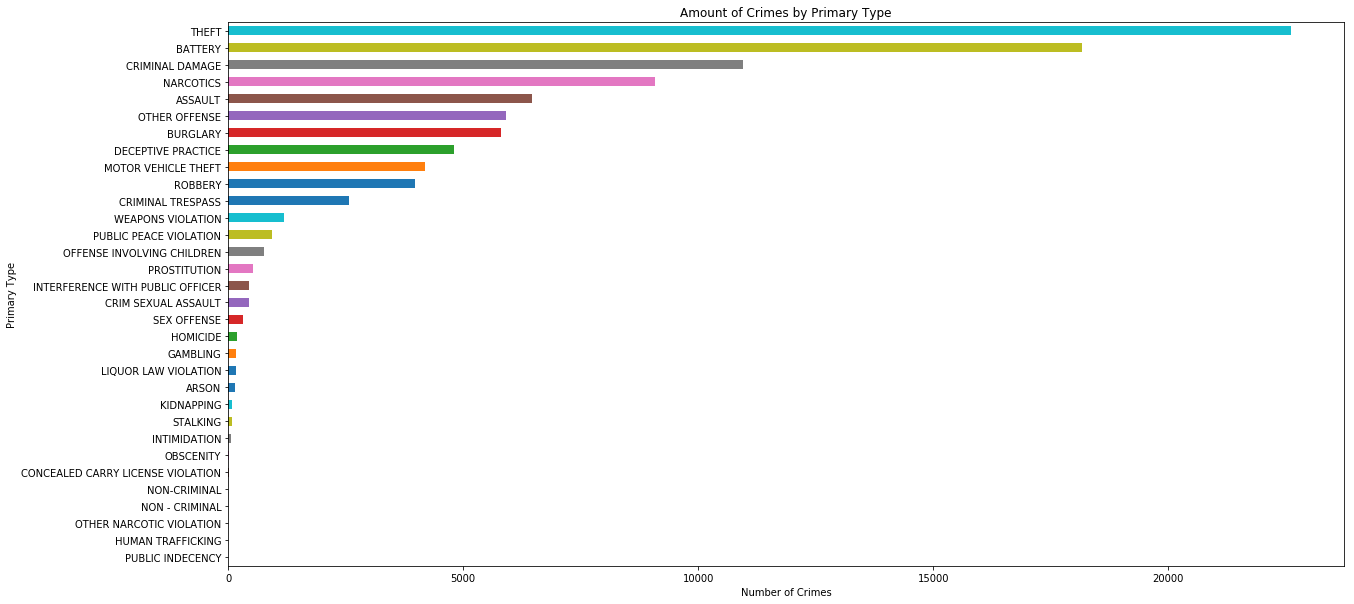

In [12]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(20,10))
plt.title('Amount of Crimes by Primary Type')

plt.xlabel('Number of Crimes')
plt.ylabel('Type of Crime')
graph = df.groupby([df['Primary Type']]).size().sort_values(ascending=True)
graph.plot(kind='barh')

plt.show()

We can see that some crimes have very less frequeny and we can club them as others

In [13]:


# we sum up the amount of Crime Type happened and select the last 10classes
crime_classes = df.groupby(['Primary Type'])['IUCR'].size().reset_index()
#print(all_classes.head())
crime_classes.rename(columns={"IUCR":"Size"},inplace=True)
crime_classes = crime_classes.sort_values(['Size'], ascending=[False])

other_classes = crime_classes.tail(10)
other_classes

,Primary Type,Size
14,KIDNAPPING,75
29,STALKING,73
13,INTIMIDATION,50
20,OBSCENITY,10
4,CONCEALED CARRY LICENSE VIOLATION,7
19,NON-CRIMINAL,6
18,NON - CRIMINAL,3
22,OTHER NARCOTIC VIOLATION,3
11,HUMAN TRAFFICKING,2
25,PUBLIC INDECENCY,1


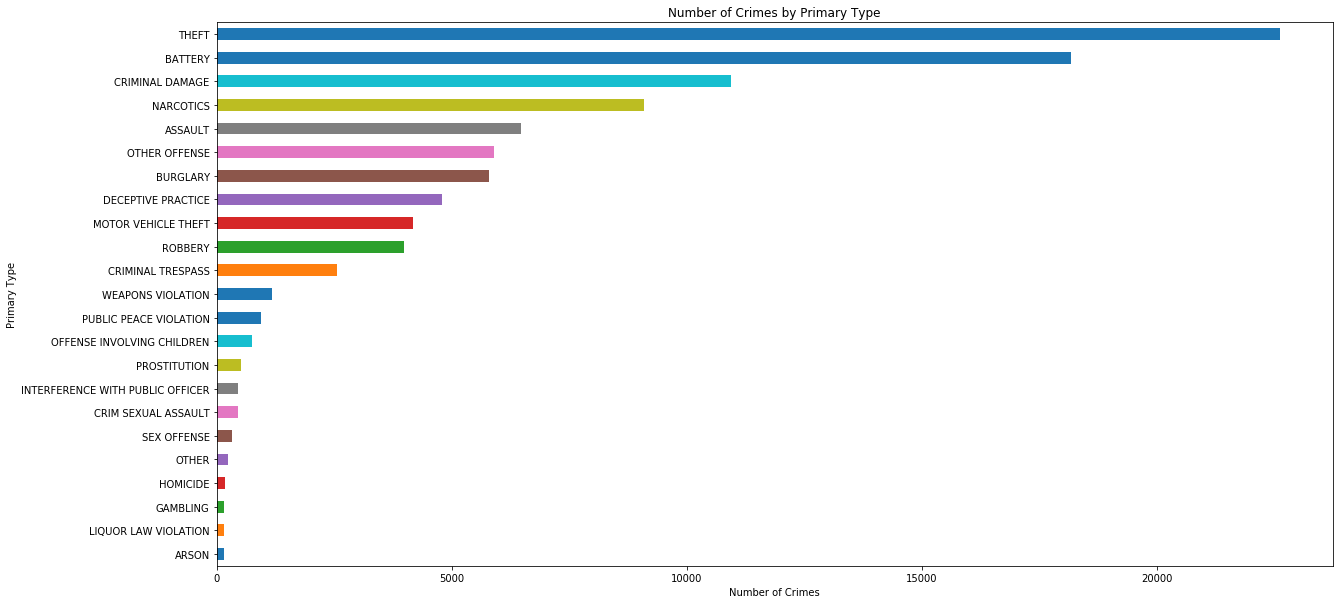

In [14]:
name_dic = {"KIDNAPPING":"OTHER",
"STALKING":"OTHER",
"INTIMIDATION":"OTHER",
"OBSCENITY":"OTHER",
"PUBLIC INDECENCY":"OTHER",
"CONCEALED CARRY LICENSE VIOLATION":"OTHER",
"NON-CRIMINAL":"OTHER",
"NON - CRIMINAL":"OTHER",
"HUMAN TRAFFICKING":"OTHER",
"OTHER NARCOTIC VIOLATION":"OTHER"}
# After that, we replaced it with label 'OTHERS'

df.replace({"Primary Type":name_dic},inplace=True)
#df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(20,10))
plt.title('Number of Crimes by Primary Type')
plt.ylabel('Type of Crime')
plt.xlabel('Number of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [15]:
#Now we have 23 classes to predict
Classes = df['Primary Type'].unique()
len(Classes)

23

In [16]:
#Encode target class
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [17]:

# Split Dataframe to target class and features
X_data = df.drop(['Primary Type'], axis=1)
Y_data = df['Primary Type']



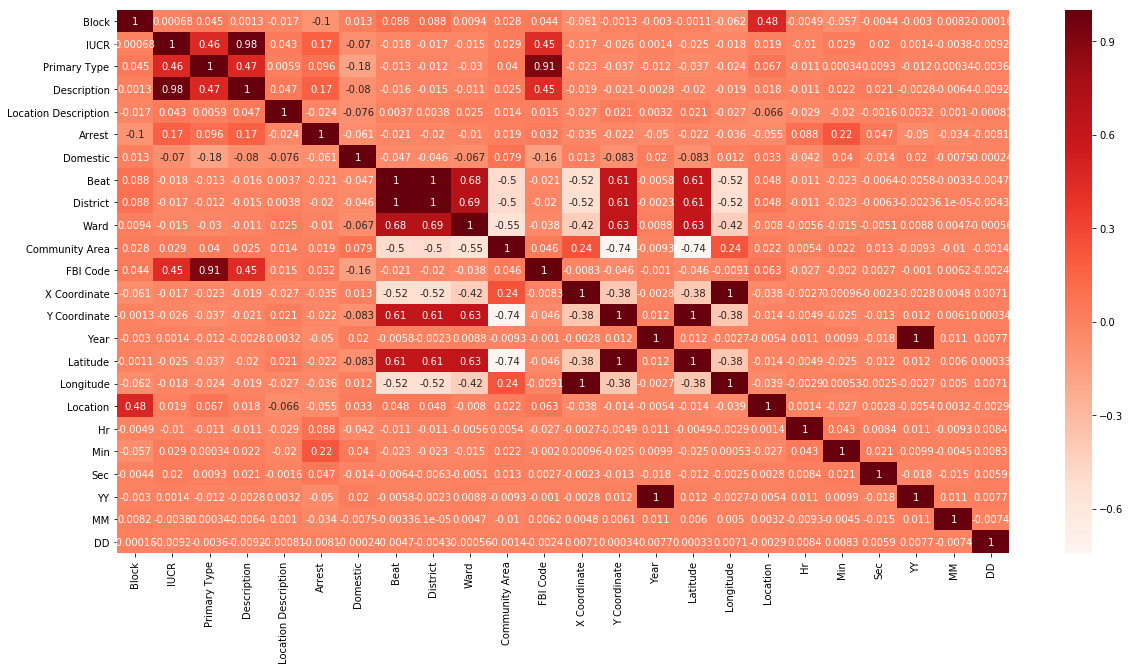

In [18]:
#Using Pearson Correlation and heatmap foe feature selection
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:

Features = ["IUCR","Description","Arrest","Location Description","Domestic"]
print('Full Features: ', Features)
Target = "Primary Type"

Full Features:  ['IUCR', 'Description', 'Arrest', 'Location Description', 'Domestic']


In [22]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Features  : ', Features)
print('Target Class        : ', Target)
print('Training Set   : ', x.shape)
print('Test Set     : ', y.shape)

Features  :  ['IUCR', 'Description', 'Arrest', 'Location Description', 'Domestic']
Target Class        :  Primary Type
Training Set   :  (80000, 24)
Test Set     :  (20000, 24)


In [23]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier()

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

C:\Users\tanma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:


print("Random Forest Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))


Random Forest Results
Accuracy    :  0.992
Recall      :  0.992
Precision   :  0.9919089395908662
F1 Score    :  0.992


In [25]:
rf_model = RandomForestClassifier(n_estimators=20, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 20, 
                                  min_samples_leaf = 25)
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [26]:
print("Random Forest Results (Tuned)")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

Random Forest Results (Tuned)
Accuracy    :  0.9694
Recall      :  0.9694
Precision   :  0.9693551768577167
F1 Score    :  0.9694


In [27]:
knn_model = KNeighborsClassifier()
knn_model.fit(X=x1,y=x2)  
result = knn_model.predict(y[Features])

In [28]:
print("KNN Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))


KNN Results
Accuracy    :  0.98365
Recall      :  0.98365
Precision   :  0.98359532945818
F1 Score    :  0.98365


In [29]:
knn_model = KNeighborsClassifier(n_neighbors=7,weights='distance')
knn_model.fit(X=x1,y=x2)  
result = knn_model.predict(y[Features])

In [30]:
print("KNN Results(Tuned)")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

KNN Results(Tuned)
Accuracy    :  0.9884
Recall      :  0.9884
Precision   :  0.9884235088414384
F1 Score    :  0.9884


In [31]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X=x1,y=x2)
result = xg_model.predict(y[Features])

In [32]:
print("XGB Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

XGB Results
Accuracy    :  0.984
Recall      :  0.984
Precision   :  0.9848091467665612
F1 Score    :  0.984


In [33]:
xg_model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimator=150)
xg_model.fit(X=x1,y=x2)
result = xg_model.predict(y[Features])

In [34]:
print("XGB Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

XGB Results
Accuracy    :  0.99665
Recall      :  0.99665
Precision   :  0.9966657653162163
F1 Score    :  0.99665


In [35]:
MLP_model = MLPClassifier()
xg_model.fit(X=x1,y=x2)
result = xg_model.predict(y[Features])

In [65]:
print("MLPClassifier Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

MLPClassifier Results
Accuracy    :  0.9968
Recall      :  0.9968
Precision   :  0.9968296360098488
F1 Score    :  0.9968


In [66]:
MLP_model = MLPClassifier(hidden_layer_sizes=(150,2))
xg_model.fit(X=x1,y=x2)
result = xg_model.predict(y[Features])

In [67]:
print("MLPClassifier Results")
print("Accuracy    : ", accuracy_score(y2, result))
print("Recall      : ", recall_score(y2, result, average="weighted"))
print("Precision   : ", precision_score(y2, result, average="weighted"))
print("F1 Score    : ", f1_score(y2, result, average='micro'))

MLPClassifier Results
Accuracy    :  0.9968
Recall      :  0.9968
Precision   :  0.9968296360098488
F1 Score    :  0.9968
